# Tweet Semantic Analysis

In [ ]:
#!python -m pip install -U gensim

In [1]:
import numpy as np
import pandas as pd
import string
import spacy
import re
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from google.colab import files
uploaded=files.upload()

Saving tweet.csv to tweet.csv


In [4]:
tweet=pd.read_csv('tweet.csv')
tweet.head(10)

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative
5  Tune in to Nigezie and be treated to Rachel Pl...  figurative
6  What iz thiz?!?!? A friggin DC love fest??!?!?...  figurative
7  man, i wish i could sexually harass an intoxic...  figurative
8  @raaachf for the car ride when I get to listen...  figurative
9  Aamir calls #BajrangiBhaijaan as Salman's best...  figurative

In [ ]:
tweet.tail(10)

tweets    class
81398             Whoa. Didn't see that coming. #sarcasm  sarcasm
81399  An hour busride home soakin wet is the best th...  sarcasm
81400  Nothing like having someone to talk to about y...  sarcasm
81401  Looks like aj brown is having a bad game... He...  sarcasm
81402                oh I love 4 hour bus rides #sarcasm  sarcasm
81403  Photo: Image via We Heart It http://t.co/ky8Nf...  sarcasm
81404  I never knew..I better put this out to the Uni...  sarcasm
81405  hey just wanted to say thanks @ puberty for le...  sarcasm
81406  I'm sure coverage like the Fox News Special “T...  sarcasm
81407  @skeyno16 at u13?! I won't believe it until I ...  sarcasm

## EDA

In [ ]:
tweet.shape

(81408, 2)

In [ ]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


*   There are totally 81,408 tweets
*   There are no null values in data




In [ ]:
# Describing the data
tweet.describe()

tweets       class
count                                               81408       81408
unique                                              67997           4
top     $$$=&gt;&gt; #peace #love #freedom\n#fight for...  figurative
freq                                                   14       21238

*   tweets: In 81,408 tweets 67,997 are unique so there are 13,411 duplicates in the data
*   class: There are 4 different classes among them 'figurative' has the highest frequency.



In [ ]:
# Checking for duplicate values
print("Number of dupilcated rows:",tweet[tweet.duplicated].shape[0])
tweet[tweet.duplicated]

Number of dupilcated rows: 49


tweets       class
12617                                             #Irony  figurative
17820                                             #irony  figurative
21104                                           #sarcasm  figurative
31250                                            #ironic       irony
35871                                             #Irony       irony
36717                                             #irony       irony
39333  #Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...       irony
39335  mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...       irony
39350  #Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...       irony
39355  mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...       irony
41147  If someone tries to convince you're better off...       irony
41198  Some girls want to be treated like Queens but ...       irony
41206  Some girls want to be treated like Queens but ...       irony
41210  Some girls want to be treated like Queens but ...       irony
41211  Some girls want to be treated like Queens but ...       irony
41213  Some girls want to be treated like Queens but ...       irony
41221  Some girls want to be treated like Queens but ...       irony
41222  @RealMichaelKay crazy ur call of Beltrans hr w...       irony
41223  Some girls want to be treated like Queens but ...       irony
41228  Some girls want to be treated like Queens but ...       irony
44686  #US 4-Star Army General Abused by Fayetteville...     regular
45232  I'm okay now, I've just taken my happy pill #h...     regular
46545  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46547  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46554  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46555  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46558  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46560  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46568  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46578  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46583  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46589  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46591  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46600  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46609  $$$=&gt;&gt; #peace #love #freedom\n#fight for...     regular
46870  #Shallow in #perception #deceived by #perceive...     regular
47009  Are you sure you don't have a #learning #disab...     regular
47565  #Shallow in #perception #deceived by #perceive...     regular
47634  Are you sure you don't have a #learning #disab...     regular
47811  FORM YOUR #FUTURE\n(http://t.co/jxEx1NG8qb)\n#...     regular
47852  WORDS OF THE WISE \n(http://t.co/uwmXh49HVo) \...     regular
48346  #Pluralism &amp; #Rationality. The limits of #...     regular
50632  and a whole lot of drugs! all of them, every s...     regular
50745  FREE LIMITED TIME, COP IT NOW! https://t.co/cs...     regular
51404  FREE LIMITED TIME, COP IT NOW! https://t.co/cs...     regular
51734  #howto #heal #depression without #drugs http:/...     regular
68455                                           #Sarcasm     sarcasm
78044                                           #sarcasm     sarcasm
78433                                           #sarcasm     sarcasm

There are 49 duplicates present in the entire data

In [ ]:
# Checking for duplicates in the columns tweets
tweet[tweet.duplicated('tweets')]

tweets       class
12617                                             #Irony  figurative
17820                                             #irony  figurative
21104                                           #sarcasm  figurative
21238  Fav moment in Sepp Blatter vid (0:20): "We hav...       irony
21239  Just found this while walking my human.... #ir...       irony
...                                                  ...         ...
80427  Approach, stick, and get infected. #funny #sar...     sarcasm
80432  Only newlyweds and liars have sex every day. #...     sarcasm
80435  @CoralieAlison YEAH! LETS GIVE WOMEN RIGHTS BY...     sarcasm
80463  Demolishing homes, targeting parents, stealing...     sarcasm
80464  I'm at the library and my phone has been dead ...     sarcasm

[13411 rows x 2 columns]

There are only 49 duplicates in the entire data but 13,411 in the column 'tweets', therefore there maybe the different classes identified for the same tweet.

There are same tweets with different cases(upper and lower case ) so we shall normalize the data and then check for duplicates.

In [5]:
# Converting the data into lower case
tweet['tweets']=tweet['tweets'].apply(lambda x:str(x).lower())
tweet

tweets       class
0      be aware  dirty step to get money  #staylight ...  figurative
1      #sarcasm for #people who don't understand #diy...  figurative
2      @iminworkjeremy @medsingle #dailymail readers ...  figurative
3      @wilw why do i get the feeling you like games?...  figurative
4      -@teacherarthurg @rweingarten you probably jus...  figurative
...                                                  ...         ...
81403  photo: image via we heart it http://t.co/ky8nf...     sarcasm
81404  i never knew..i better put this out to the uni...     sarcasm
81405  hey just wanted to say thanks @ puberty for le...     sarcasm
81406  i'm sure coverage like the fox news special “t...     sarcasm
81407  @skeyno16 at u13?! i won't believe it until i ...     sarcasm

[81408 rows x 2 columns]

In [ ]:
tweet[tweet['tweets']=='#irony']

tweets       class
6397   #irony  figurative
11011  #irony  figurative
12617  #irony  figurative
17820  #irony  figurative
28512  #irony       irony
33843  #irony       irony
35871  #irony       irony
36717  #irony       irony

In [ ]:
#tweet=tweet.drop_duplicates()
#tweet.shape

For the same tweet two different classes are assigned so we shall remove them all.

In [6]:
# Checking for noisy in the columns tweets
noisy=tweet[tweet.duplicated(subset=['tweets'],keep=False)]
noisy

tweets       class
0      be aware  dirty step to get money  #staylight ...  figurative
2      @iminworkjeremy @medsingle #dailymail readers ...  figurative
3      @wilw why do i get the feeling you like games?...  figurative
4      -@teacherarthurg @rweingarten you probably jus...  figurative
5      tune in to nigezie and be treated to rachel pl...  figurative
...                                                  ...         ...
80427  approach, stick, and get infected. #funny #sar...     sarcasm
80432  only newlyweds and liars have sex every day. #...     sarcasm
80435  @coraliealison yeah! lets give women rights by...     sarcasm
80463  demolishing homes, targeting parents, stealing...     sarcasm
80464  i'm at the library and my phone has been dead ...     sarcasm

[26795 rows x 2 columns]

There are 26795 rows in the dataset whose classes are classified ambiguously

In [7]:
# Getting the indices of ambiguous data row
indices=noisy.index
len(indices)

#Deleting the ambiguous rows
tweet=tweet.drop(indices).reset_index().drop('index',axis=1)
tweet

# Appending the corrected rows to the dataset tweet
#tweet=tweet.append(new_df,ignore_index=True)
#tweet

tweets       class
0      #sarcasm for #people who don't understand #diy...  figurative
1      man, i wish i could sexually harass an intoxic...  figurative
2      @ciarakellydoc @lunchtiment dont be daft dr ci...  figurative
3      a totally not panic-attack inducing way to spe...  figurative
4      this is my bed it's all the way on the floor y...  figurative
...                                                  ...         ...
54608  photo: image via we heart it http://t.co/ky8nf...     sarcasm
54609  i never knew..i better put this out to the uni...     sarcasm
54610  hey just wanted to say thanks @ puberty for le...     sarcasm
54611  i'm sure coverage like the fox news special “t...     sarcasm
54612  @skeyno16 at u13?! i won't believe it until i ...     sarcasm

[54613 rows x 2 columns]

In [ ]:
tweet[tweet['tweets']=='#irony']

Empty DataFrame
Columns: [tweets, class]
Index: []

In [ ]:
# Frequeny of classes in percentage
tweet['class'].value_counts()

regular       18555
sarcasm       15403
irony         12782
figurative     7873
Name: class, dtype: int64

In [ ]:
tweet.groupby('class').describe()

tweets                                                            \
            count unique                                                top   
class                                                                         
figurative   7873   7873  #sarcasm for #people who don't understand #diy...   
irony       12782  12782  'disrespected the wife of prophet' - pseudo li...   
regular     18555  18555  new #quote : it's both a blessing and a curse ...   
sarcasm     15403  15403  “@thinkinghumanit: #sarcastic people are actua...   

                 
           freq  
class            
figurative    1  
irony         1  
regular       1  
sarcasm       1

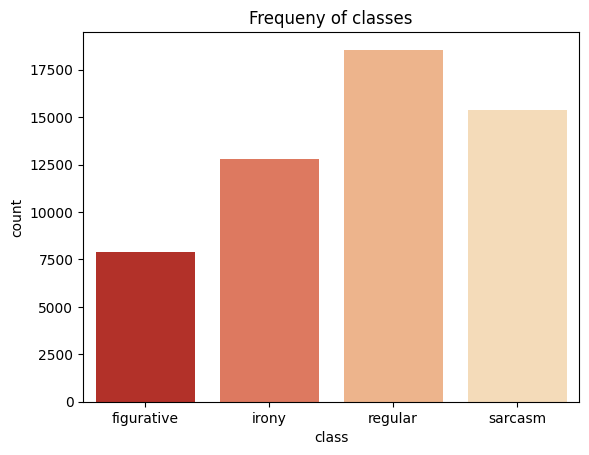

In [ ]:
sns.countplot(data=tweet,x='class',palette='OrRd_r')
plt.title('Frequeny of classes')
plt.show()

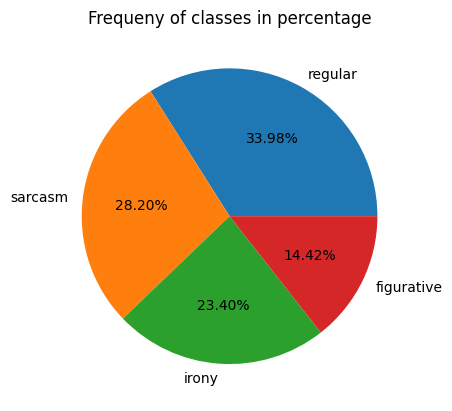

In [ ]:
plt.pie(((tweet['class'].value_counts()/tweet.shape[0])*100).tolist(),labels=((tweet['class'].value_counts()/tweet.shape[0])*100).index,autopct='%.2f%%')
plt.title('Frequeny of classes in percentage')
plt.show()

In [ ]:
# Number of words
tweet['word_count'] = tweet['tweets'].apply(lambda x: len(str(x).split(" ")))
tweet[['tweets','word_count']].head()

tweets  word_count
1   #sarcasm for #people who don't understand #diy...           9
7   man, i wish i could sexually harass an intoxic...          16
14  @ciarakellydoc @lunchtiment dont be daft dr ci...          21
33  a totally not panic-attack inducing way to spe...          15
41  this is my bed it's all the way on the floor y...          14

In [ ]:
# Number of characters
tweet['char_count'] = tweet['tweets'].str.len() # this also includes spaces
tweet[['tweets','char_count']].head()

tweets  char_count
1   #sarcasm for #people who don't understand #diy...          80
7   man, i wish i could sexually harass an intoxic...          84
14  @ciarakellydoc @lunchtiment dont be daft dr ci...         140
33  a totally not panic-attack inducing way to spe...         122
41  this is my bed it's all the way on the floor y...          80

In [8]:
stop = stopwords.words('english')

In [ ]:
# Number of stopwords

tweet['stopwords'] = tweet['tweets'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweet[['tweets','stopwords']].head()

tweets  stopwords
1   #sarcasm for #people who don't understand #diy...          3
7   man, i wish i could sexually harass an intoxic...          6
14  @ciarakellydoc @lunchtiment dont be daft dr ci...          4
33  a totally not panic-attack inducing way to spe...          4
41  this is my bed it's all the way on the floor y...          8

In [ ]:
# number of hashtags
tweet['hashtags'] = tweet['tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweet[['tweets','hashtags']].head()

tweets  hashtags
1   #sarcasm for #people who don't understand #diy...         4
7   man, i wish i could sexually harass an intoxic...         1
14  @ciarakellydoc @lunchtiment dont be daft dr ci...         1
33  a totally not panic-attack inducing way to spe...         3
41  this is my bed it's all the way on the floor y...         1

In [ ]:
# number of User tags
tweet['User_tags'] = tweet['tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tweet[['tweets','User_tags']].head()

tweets  User_tags
1   #sarcasm for #people who don't understand #diy...          4
7   man, i wish i could sexually harass an intoxic...          1
14  @ciarakellydoc @lunchtiment dont be daft dr ci...          1
33  a totally not panic-attack inducing way to spe...          3
41  this is my bed it's all the way on the floor y...          1

In [ ]:
# number of http link
tweet['link'] = tweet['tweets'].apply(lambda x: len([x for x in x.split() if x.startswith('http')]))
tweet[['tweets','link']].head()

tweets  link
1   #sarcasm for #people who don't understand #diy...     1
7   man, i wish i could sexually harass an intoxic...     0
14  @ciarakellydoc @lunchtiment dont be daft dr ci...     0
33  a totally not panic-attack inducing way to spe...     1
41  this is my bed it's all the way on the floor y...     1

## Data Preprocessing

In [ ]:
tweet_info=tweet.copy()

In [ ]:
tweet=tweet_info.iloc[:,:2]
tweet

tweets       class
1      #sarcasm for #people who don't understand #diy...  figurative
7      man, i wish i could sexually harass an intoxic...  figurative
14     @ciarakellydoc @lunchtiment dont be daft dr ci...  figurative
33     a totally not panic-attack inducing way to spe...  figurative
41     this is my bed it's all the way on the floor y...  figurative
...                                                  ...         ...
81403  photo: image via we heart it http://t.co/ky8nf...     sarcasm
81404  i never knew..i better put this out to the uni...     sarcasm
81405  hey just wanted to say thanks @ puberty for le...     sarcasm
81406  i'm sure coverage like the fox news special “t...     sarcasm
81407  @skeyno16 at u13?! i won't believe it until i ...     sarcasm

[54613 rows x 2 columns]

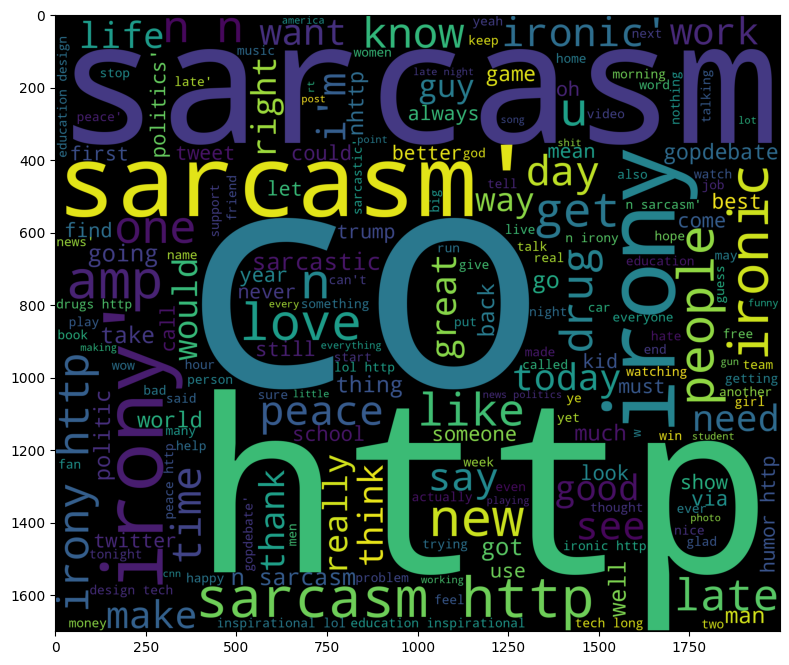

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700,stopwords=stop).generate(str([Text.strip() for Text in tweet.tweets]))
plt.imshow(wordcloud)

In [9]:
# Data Cleaning

def clean(tweets):
  tweets=re.sub(r'[0-9]',"",str(tweets)) # Removing the digits
  tweets=re.sub(r'#',"",str(tweets)) # Removing '#' from hash tags
  tweets=re.sub(r"@[\w]*","",tweets) # Removing user tags
  tweets=re.sub(r"http\S+","",tweets) # Removing urls
  tweets=re.sub(r'[^\w\s]',"",tweets) # Remove symbols
  #tweets=re.sub(r'(.)\1+',"r\1",tweets) # Removing the repeated letters in a word
  return tweets

In [10]:
tweet['tweets']=tweet.tweets.apply(clean)
tweet

tweets       class
0      sarcasm for people who dont understand diy art...  figurative
1      man i wish i could sexually harass an intoxica...  figurative
2        dont be daft dr ciara measles doesnt kill it...  figurative
3      a totally not panicattack inducing way to spen...  figurative
4      this is my bed its all the way on the floor ya...  figurative
...                                                  ...         ...
54608  photo image via we heart it  childhood cool fu...     sarcasm
54609  i never knewi better put this out to the unive...     sarcasm
54610  hey just wanted to say thanks  puberty for let...     sarcasm
54611  im sure coverage like the fox news special the...     sarcasm
54612    at u i wont believe it until i see it p sarcasm     sarcasm

[54613 rows x 2 columns]

In [ ]:
text=[x.strip() for x in tweet.tweets]
text=[x for x in text if x]
txt=' '.join(text)
txt

'sarcasm for people who dont understand diy artattack man i wish i could sexually harass an intoxicated minor and not go to jail sarcasm dont be daft dr ciara measles doesnt kill its an old fashioned disease like scurvy and trench foot sarcasm a totally not panicattack inducing way to spend a sunday night sarcasm cantbreathe wontsleep this is my bed its all the way on the floor yay sarcasm telegraph agency of soviet union anybody surprised says kiev illiterate spelling again used su sarcasm because everyone decides to shoot up the military when they are depressed sarcasm that justin trudeau bashing ad so lame sarcasm bullying childish sorrynotsorry ugh absolutely now who do we know that would do this kind of work sarcasm sportsbranding boy these young girls in here are going to love me sarcasm irony at its best lol looks like pti opened up a laundry service raw daagh bhi nikal jatay hain kia p leavemqmjoinpti irony carmen is an awesome songvideo the irony is not lost on me that i am us

In [ ]:
freq = pd.Series(' '.join(tweet['tweets']).split()).value_counts()
print("Most frequently used words \n",freq[:50])
print("\n\n  Least frequently used words \n",freq[-20:])

Most frequently used words 
 the          21789
sarcasm      19916
to           15986
a            13981
irony        11784
i            10144
of            9757
is            8913
in            8711
and           8348
for           7557
you           6865
on            6333
that          5408
it            4812
my            4656
this          4076
ironic        4010
so            3529
with          3498
be            3454
are           3413
at            3364
news          3266
peace         3008
just          2939
have          2928
late          2887
not           2839
education     2808
humor         2783
politics      2650
drugs         2645
me            2581
its           2579
but           2528
all           2520
your          2434
was           2412
love          2389
about         2369
when          2363
how           2213
we            2183
im            2171
amp           2152
what          2140
they          2138
like          2135
by            2112
dtype: int64


  Leas

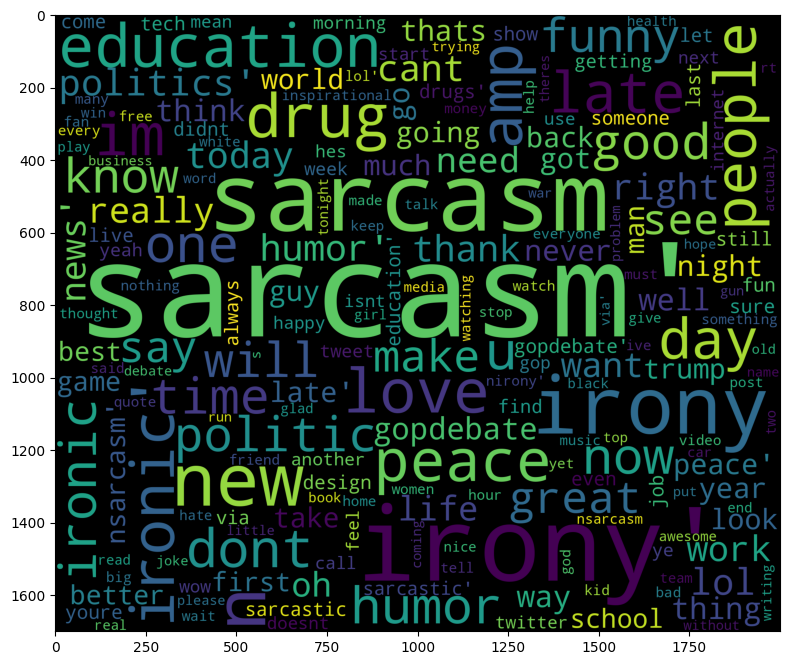

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700,collocations=False).generate(str([Text.strip() for Text in tweet.tweets]))
plt.imshow(wordcloud)

### Analysing the class 'figurative'

In [ ]:
figurative=tweet[tweet['class']=='figurative']
figurative

tweets       class
0      sarcasm for people who dont understand diy art...  figurative
1      man i wish i could sexually harass an intoxica...  figurative
2        dont be daft dr ciara measles doesnt kill it...  figurative
3      a totally not panicattack inducing way to spen...  figurative
4      this is my bed its all the way on the floor ya...  figurative
...                                                  ...         ...
67967  rt  a so   please  amazon products funny sarca...  figurative
67968  irony trilogy \nbook   the animal is now free ...  figurative
67969  no sweat pants allowed  wine club sassy funny ...  figurative
67970  someone compared our sweet painted art for aqd...  figurative
67971  i love that people sing about fat girls but th...  figurative

[21228 rows x 2 columns]

In [ ]:
freqf= pd.Series(' '.join(figurative['tweets']).split()).value_counts()

print(" Most frequently used words figurative class\n\n",freqf[:50])
#print("\n\n Least frequently used words figurative class\n",freqf[-20:])

 Most frequently used words figurative class

 sarcasm    10209
the         9835
irony       7972
to          6921
a           6456
i           5005
is          4078
of          4057
in          3581
and         3577
you         3014
for         2964
ironic      2903
on          2728
that        2702
it          2278
my          2275
this        1838
so          1725
are         1593
be          1532
at          1430
with        1389
have        1358
just        1354
but         1329
not         1328
me          1260
about       1213
was         1190
when        1184
its         1146
all         1140
they        1091
im          1075
we          1018
like         973
people       953
how          933
your         923
what         910
by           876
no           843
love         839
who          831
get          824
dont         817
out          815
an           811
from         808
dtype: int64


Text(0.5, 1.0, 'figurative')

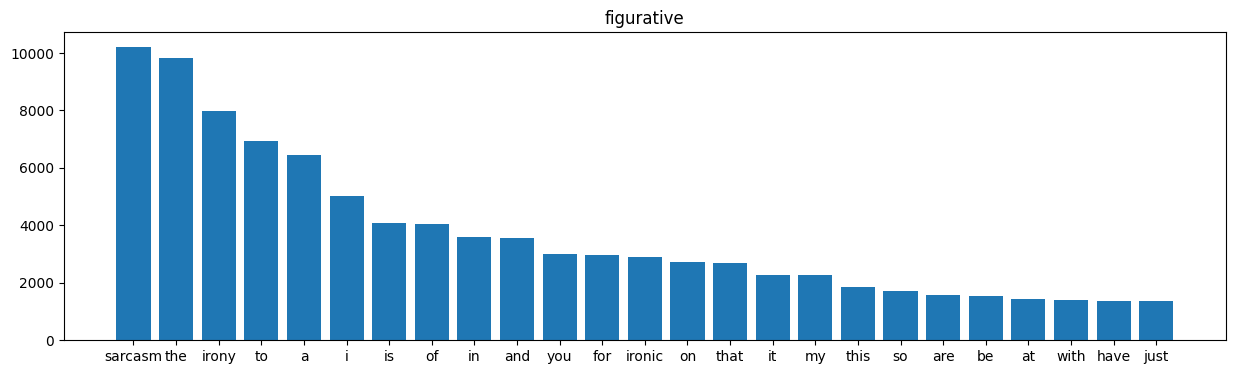

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(x=freqf.index[:25],height=freqf.tolist()[:25])
plt.title('figurative')

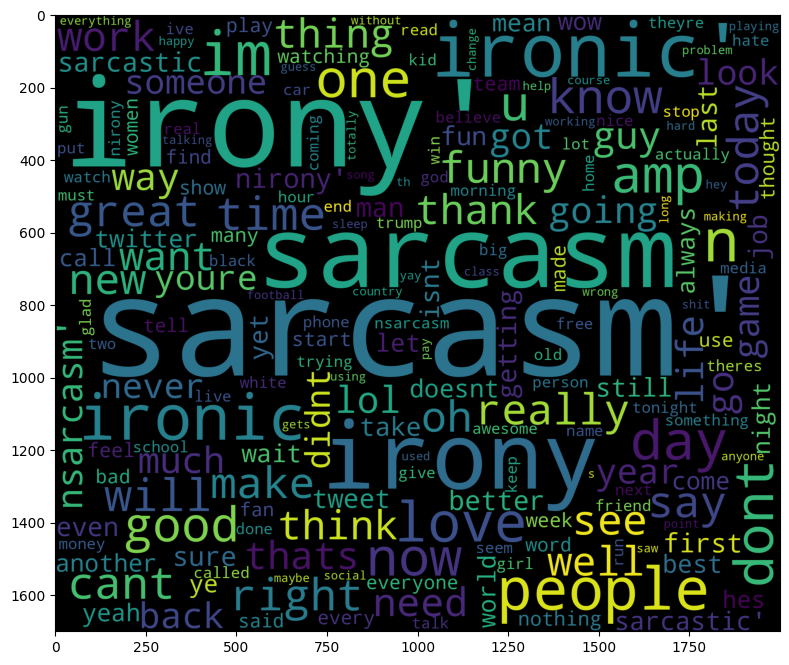

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700,collocations=False).generate(str([Text.strip() for Text in figurative.tweets]))
plt.imshow(wordcloud)

### Analysing the class 'irony'

In [ ]:
irony=tweet[tweet['class']=='irony']
irony

tweets  class
7873   disrespected the wife of prophet  pseudo libta...  irony
7874   looking forward to next week and stepping away...  irony
7875   get to work to realize oatmeal packet i grabbe...  irony
7876    waise what blocking means to nida is awesome ...  irony
7877    he has stated he wants to destroy the is cali...  irony
...                                                  ...    ...
67972  mikloshvanegan russia cartoon  bilderberg lobb...  irony
67973  russia cartoon  bilderberg lobbyistsyet wikile...  irony
67974  if someone tries to convince youre better off ...  irony
67975   crazy ur call of beltrans hr was warily simil...  irony
67976  some girls want to be treated like queens but ...  irony

[12789 rows x 2 columns]

In [ ]:
freqi = pd.Series(' '.join(irony['tweets']).split()).value_counts()
print(" Most frequently used wordsin irony\n",freqi[:50])
#print("\n\n Least frequently used words in irony \n",freqi[-20:])

 Most frequently used wordsin irony
 irony     9971
the       6715
to        4509
a         4314
ironic    3212
of        2847
i         2659
is        2569
in        2529
and       2397
on        2029
for       1832
you       1696
that      1693
it        1353
my        1339
this      1050
are        959
with       920
about      916
but        899
when       865
at         827
just       825
so         809
was        799
be         780
me         776
have       769
they       748
not        743
its        734
who        687
people     686
by         680
from       632
amp        626
an         604
all        597
how        573
as         560
your       542
we         538
out        537
like       527
im         512
now        506
up         495
he         487
what       458
dtype: int64


Text(0.5, 1.0, 'Irony')

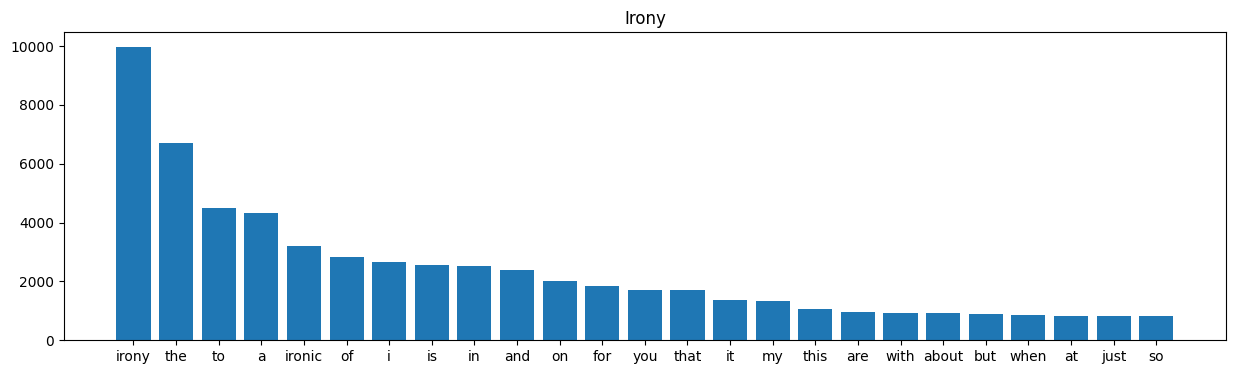

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(x=freqi.index[:25],height=freqi.tolist()[:25])
plt.title('Irony')

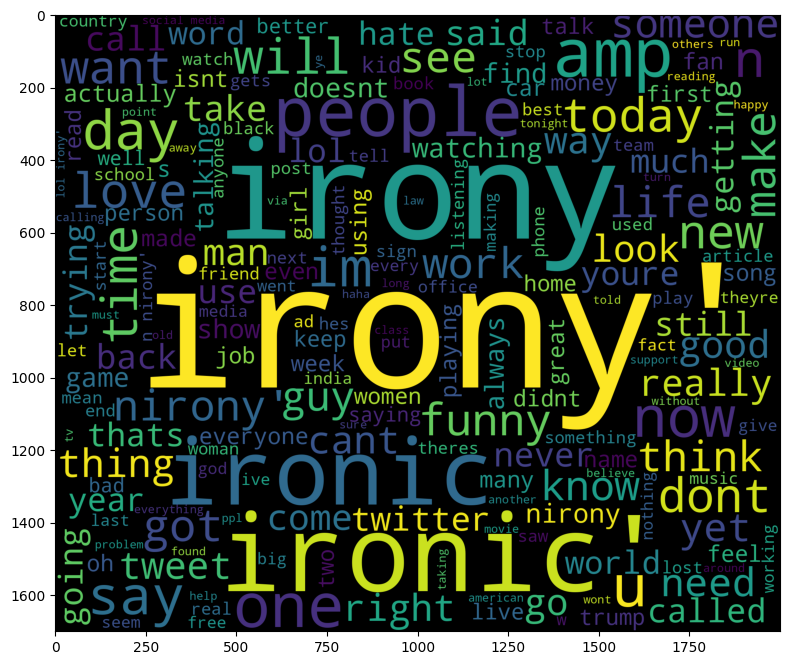

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700).generate(str([Text.strip() for Text in irony.tweets]))
plt.imshow(wordcloud)

### Analysing the class 'regular'

In [ ]:
regular=tweet[tweet['class']=='regular']
regular

tweets    class
20655  new quote  its both a blessing and a curse to ...  regular
20656  daddy uncle bubba life love loss laughter amp ...  regular
20657  ayvee  where im from on soundcloud late night ...  regular
20658  late starting dinner tonight but here is what ...  regular
20659                           happy birthdayyyyy late   regular
...                                                  ...      ...
67985  and a whole lot of drugs all of them every sig...  regular
67986  free limited time cop it now   asmg thriller l...  regular
67987  free limited time cop it now  books hiphop lov...  regular
67988              howto heal depression without drugs    regular
67989               politics fed leaves rates unchanged   regular

[18568 rows x 2 columns]

In [ ]:
freqr = pd.Series(' '.join(regular['tweets']).split()).value_counts()
print(" Most frequently used wordsin regular\n",freqr[:50])
#print("\n\n Least frequently used words in regular \n",freqr[-20:])

 Most frequently used wordsin regular
 the          5509
to           4369
a            3218
of           3101
peace        2958
news         2936
in           2844
late         2767
education    2760
drugs        2617
politics     2581
humor        2579
for          2379
and          2346
is           2199
on           1898
you          1655
i            1610
gopdebate    1440
with         1166
this          973
at            954
it            900
be            880
my            878
funny         858
your          844
amp           822
love          810
are           802
by            741
that          734
lol           733
from          643
not           641
new           627
via           598
design        597
have          585
out           585
more          577
we            558
all           557
how           553
us            553
what          536
tech          535
as            513
gop           494
up            493
dtype: int64


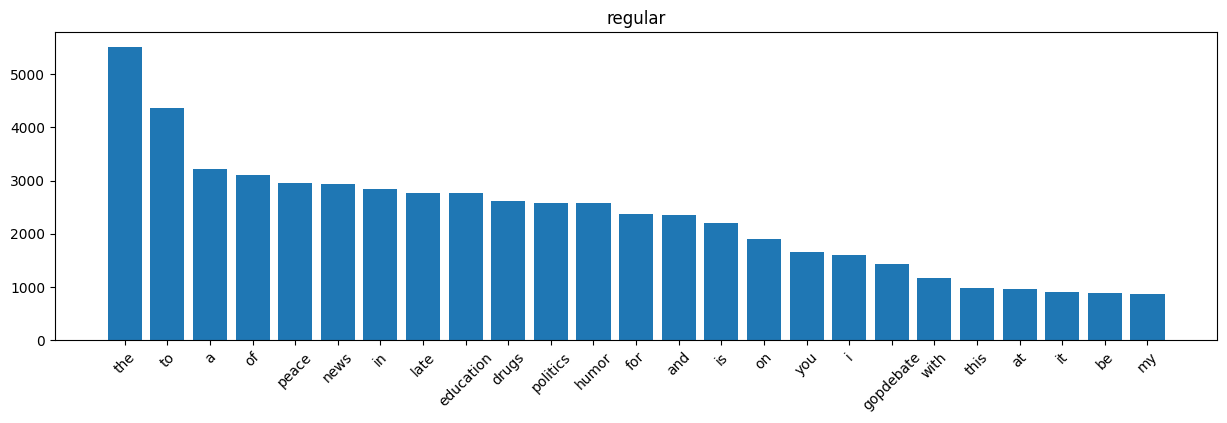

In [ ]:
plt.rcParams['figure.figsize']=(15,4)
fig,ax=plt.subplots()
plt.bar(x=freqr.index[:25],height=freqr.tolist()[:25])
plt.title('regular')
ax.tick_params(axis='x',labelrotation = 45)
plt.show()

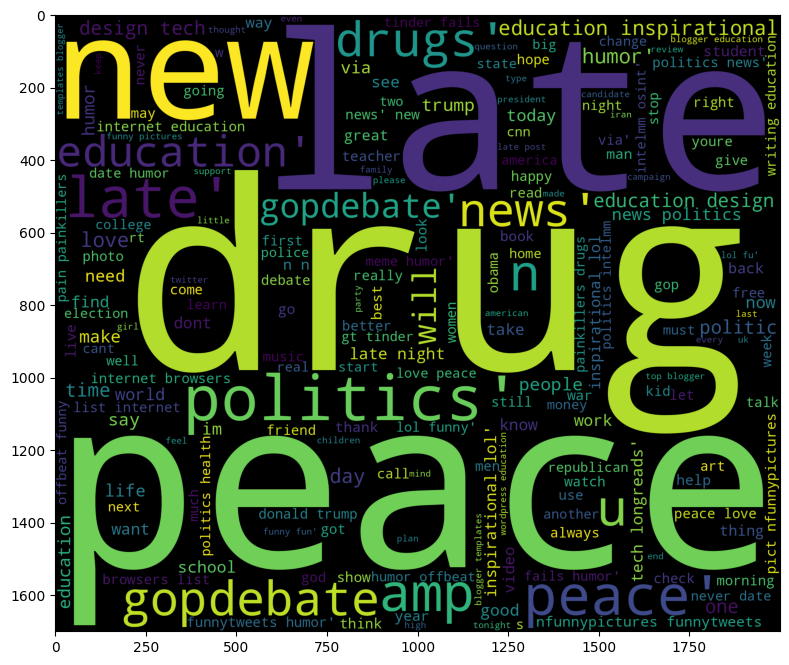

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700).generate(str([Text.strip() for Text in regular.tweets]))
plt.imshow(wordcloud)

### Analysing the class 'sarcasm'

In [ ]:
sarcasm=tweet[tweet['class']=='sarcasm']
sarcasm

tweets    class
39210   sarcastic people are actually smarter sexier ...  sarcasm
39211  in ca for  days and it rains  of them imaginar...  sarcasm
39212  because we have no access to implements at hom...  sarcasm
39213  and the news gets even better sarcastic darkma...  sarcasm
39214  dont ride him too long joe edwin and travis ca...  sarcasm
...                                                  ...      ...
54610  hey just wanted to say thanks  puberty for let...  sarcasm
54611  im sure coverage like the fox news special the...  sarcasm
54612    at u i wont believe it until i see it p sarcasm  sarcasm
64047  this day just keeps getting better and better ...  sarcasm
65960                                            sarcasm  sarcasm

[15405 rows x 2 columns]

In [ ]:
freqs = pd.Series(' '.join(sarcasm['tweets']).split()).value_counts()
print("Most frequently used wordsin Sarcasm\n",freqs[:50])
#print("\n\n Least frequently used words in Sarcasm \n",freqs[-20:])

Most frequently used wordsin Sarcasm
 sarcasm      14740
the           6025
to            4682
a             4127
i             3957
is            2680
of            2424
you           2396
and           2360
for           2176
in            2157
that          1955
it            1734
my            1622
so            1568
on            1475
this          1379
be            1210
just          1120
are           1085
at            1065
have          1060
not            957
me             950
its            933
with           932
sarcastic      926
im             926
all            923
love           892
like           822
was            817
what           807
but            752
they           746
how            732
we             725
your           711
no             707
when           699
good           655
dont           653
great          644
people         637
get            603
up             579
about          574
know           570
he             565
out            562
dtype: int64

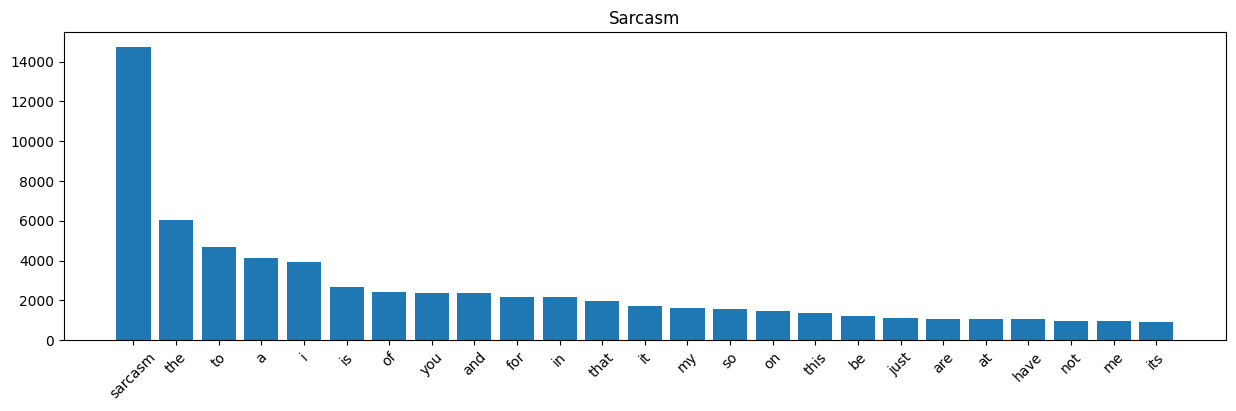

In [ ]:
plt.figure(figsize=(15,4))
plt.bar(x=freqs.index[:25],height=freqs.tolist()[:25])
plt.title('Sarcasm')
plt.xticks(rotation=45)
plt.show()

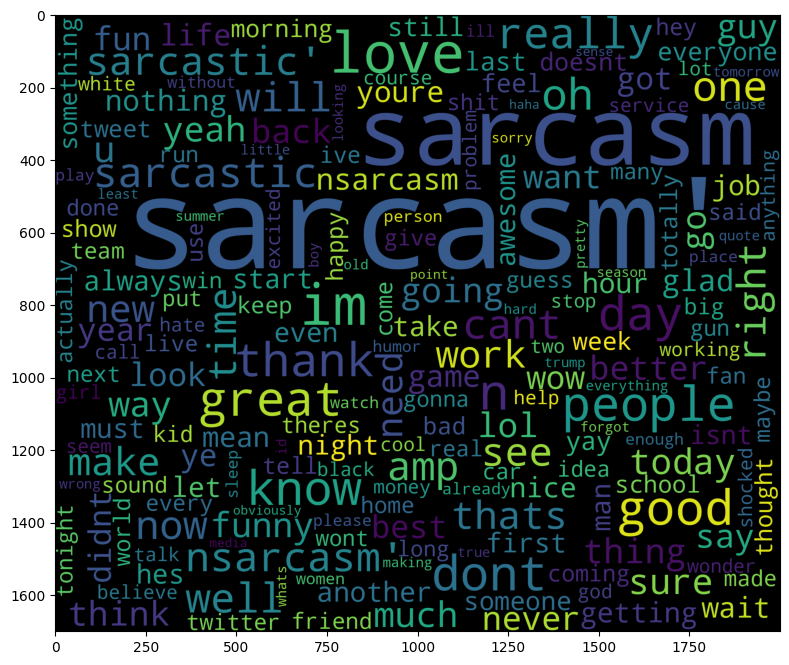

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700,collocations=False).generate(str([Text.strip() for Text in sarcasm.tweets]))
plt.imshow(wordcloud)

In [ ]:
pd.set_option('display.max_rows',120)
frequent=pd.DataFrame()
frequent['Figurative']=freqf
frequent['Regular']=freqr
frequent['Irony']=freqi
frequent['Sarcasm']=freqs
frequent.head(100)
#frequent.sort_values(by=['Irony'],ascending=False).head(100)

Figurative  Regular   Irony  Sarcasm
sarcasm         10209      NaN     7.0  14740.0
the              9835   5509.0  6715.0   6025.0
irony            7972      6.0  9971.0      6.0
to               6921   4369.0  4509.0   4682.0
a                6456   3218.0  4314.0   4127.0
i                5005   1610.0  2659.0   3957.0
is               4078   2199.0  2569.0   2680.0
of               4057   3101.0  2847.0   2424.0
in               3581   2844.0  2529.0   2157.0
and              3577   2346.0  2397.0   2360.0
you              3014   1655.0  1696.0   2396.0
for              2964   2379.0  1832.0   2176.0
ironic           2903      2.0  3212.0      6.0
on               2728   1898.0  2029.0   1475.0
that             2702    734.0  1693.0   1955.0
it               2278    900.0  1353.0   1734.0
my               2275    878.0  1339.0   1622.0
this             1838    973.0  1050.0   1379.0
so               1725    415.0   809.0   1568.0
are              1593    802.0   959.0   1085.0
be               1532    880.0   780.0   1210.0
at               1430    954.0   827.0   1065.0
with             1389   1166.0   920.0    932.0
have             1358    585.0   769.0   1060.0
just             1354    455.0   825.0   1120.0
but              1329    400.0   899.0    752.0
not              1328    641.0   743.0    957.0
me               1260    445.0   776.0    950.0
about            1213    478.0   916.0    574.0
was              1190    379.0   799.0    817.0
when             1184    410.0   865.0    699.0
its              1146    472.0   734.0    933.0
all              1140    557.0   597.0    923.0
they             1091    241.0   748.0    746.0
im               1075    321.0   512.0    926.0
we               1018    558.0   538.0    725.0
like              973    408.0   527.0    822.0
people            953    329.0   686.0    637.0
how               933    553.0   573.0    732.0
your              923    844.0   542.0    711.0
what              910    536.0   458.0    807.0
by                876    741.0   680.0    392.0
no                843    398.0   424.0    707.0
love              839    810.0   321.0    892.0
who               831    339.0   687.0    413.0
get               824    370.0   434.0    603.0
dont              817    342.0   427.0    653.0
out               815    585.0   537.0    562.0
an                811    373.0   604.0    439.0
from              808    643.0   632.0    444.0
up                803    493.0   495.0    579.0
now               800    401.0   506.0    444.0
as                798    513.0   560.0    474.0
amp               763    822.0   626.0    445.0
if                754    367.0   417.0    548.0
he                754    230.0   487.0    565.0
do                728    404.0   346.0    554.0
one               721    387.0   452.0    455.0
day               689    452.0   393.0    496.0
has               666    334.0   419.0    431.0
good              650    327.0   236.0    655.0
can               605    416.0   313.0    498.0
know              586    241.0   263.0    570.0
sarcastic         577      3.0     3.0    926.0
will              567    467.0   335.0    446.0
cant              566    141.0   323.0    461.0
great             554    226.0   114.0    644.0
more              554    577.0   344.0    469.0
because           550     78.0   277.0    417.0
funny             545    858.0   295.0    350.0
his               544    260.0   421.0    307.0
really            522    133.0   191.0    520.0
being             519    114.0   317.0    368.0
oh                519     66.0   187.0    512.0
their             513    175.0   449.0    280.0
time              502    428.0   325.0    361.0
only              495    214.0   290.0    365.0
see               492    252.0   251.0    429.0
right             490    151.0   209.0    401.0
today             486    251.0   279.0    326.0
or                473    264.0   258.0    373.0
well              471    118.0   149.0    462.0
would             458    24

Since there are many words in stop words that are frequently appearing in all the 4 classes they donot give the any valuable insights in predicting theclasses hence they can be removed from the data so that the application can focus on the important words

### Removing stop words

In [ ]:
#tweet['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word in (stop)]))

In [11]:
new_stop=['im','dont','cant','thats','us','u','isnt','doesnt','ive','youre','amp','hes','wont','didnt','youhv']
stop.extend(new_stop)
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Removing stop words

tweet['tweets']=tweet['tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweet

tweets       class
0                sarcasm people understand diy artattack  figurative
1      man wish could sexually harass intoxicated min...  figurative
2      daft dr ciara measles kill old fashioned disea...  figurative
3      totally panicattack inducing way spend sunday ...  figurative
4                              bed way floor yay sarcasm  figurative
...                                                  ...         ...
54608  photo image via heart childhood cool funny sar...     sarcasm
54609  never knewi better put universe lolmaybe there...     sarcasm
54610  hey wanted say thanks puberty letting apart it...     sarcasm
54611  sure coverage like fox news special hidden har...     sarcasm
54612                              believe see p sarcasm     sarcasm

[54613 rows x 2 columns]

#### Lemmatizing the words

In [13]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return str([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])


In [14]:
tweet['clean_tweet']=tweet['tweets'].apply(lemmatize_text)
tweet['clean_tweet']=tweet['clean_tweet'].apply(clean)
tweet

tweets       class  \
0                sarcasm people understand diy artattack  figurative   
1      man wish could sexually harass intoxicated min...  figurative   
2      daft dr ciara measles kill old fashioned disea...  figurative   
3      totally panicattack inducing way spend sunday ...  figurative   
4                              bed way floor yay sarcasm  figurative   
...                                                  ...         ...   
54608  photo image via heart childhood cool funny sar...     sarcasm   
54609  never knewi better put universe lolmaybe there...     sarcasm   
54610  hey wanted say thanks puberty letting apart it...     sarcasm   
54611  sure coverage like fox news special hidden har...     sarcasm   
54612                              believe see p sarcasm     sarcasm   

                                             clean_tweet  
0                sarcasm people understand diy artattack  
1      man wish could sexually harass intoxicated min...  
2      daft dr ciara measles kill old fashioned disea...  
3      totally panicattack inducing way spend sunday ...  
4                              bed way floor yay sarcasm  
...                                                  ...  
54608  photo image via heart childhood cool funny sar...  
54609  never knewi better put universe lolmaybe there...  
54610  hey wanted say thanks puberty letting apart it...  
54611  sure coverage like fox news special hidden har...  
54612                              believe see p sarcasm  

[54613 rows x 3 columns]

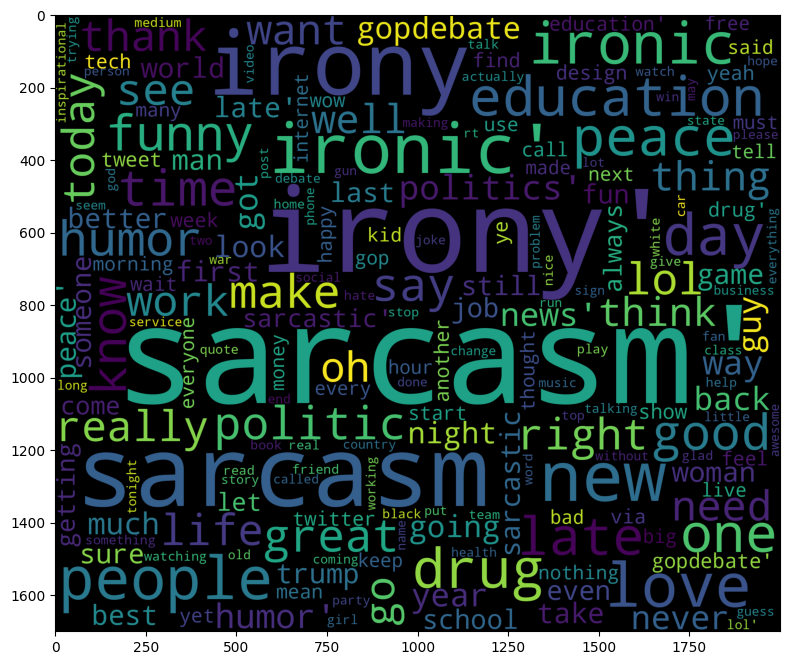

In [ ]:
plt.rcParams['figure.figsize']=(10,8)
wordcloud=WordCloud(background_color='black',width=2000,height=1700,collocations=False).generate(str([Text.strip() for Text in tweet.clean_tweet]))
plt.imshow(wordcloud)

In [15]:
figurative=tweet[tweet['class']=='figurative']
freqf = pd.Series(' '.join(figurative['clean_tweet']).split()).value_counts()

irony=tweet[tweet['class']=='irony']
freqi = pd.Series(' '.join(irony['clean_tweet']).split()).value_counts()

regular=tweet[tweet['class']=='regular']
freqr = pd.Series(' '.join(regular['clean_tweet']).split()).value_counts()

sarcasm=tweet[tweet['class']=='sarcasm']
freqs = pd.Series(' '.join(sarcasm['clean_tweet']).split()).value_counts()

In [ ]:
pd.set_option('display.max_rows',2000)
frequent=pd.DataFrame()
frequent['Figurative']=freqf
frequent['Regular']=freqr
frequent['Irony']=freqi
frequent['Sarcasm']=freqs
frequent.head(100)
#frequent.sort_values(by=['Regular']).head(100)

Figurative  Regular   Irony  Sarcasm
sarcasm          5171      NaN     7.0  14738.0
irony            1808      6.0  9968.0      6.0
ironic            792      2.0  3210.0      6.0
like              387    417.0   535.0    839.0
love              381    817.0   340.0    912.0
people            358    338.0   706.0    649.0
get               342    440.0   522.0    669.0
good              298    329.0   239.0    656.0
day               295    570.0   475.0    623.0
one               274    418.0   521.0    480.0
know              269    259.0   289.0    632.0
great             264    226.0   114.0    645.0
sarcastic         253      3.0     3.0    926.0
time              233    502.0   390.0    423.0
right             225    184.0   258.0    426.0
make              219    354.0   281.0    406.0
see               216    263.0   264.0    433.0
really            208    133.0   191.0    520.0
well              200    122.0   149.0    464.0
say               197    362.0   390.0    287.0
oh                196     66.0   188.0    513.0
game              191    106.0   147.0    244.0
would             179    248.0   258.0    369.0
today             177    292.0   298.0    343.0
work              166    265.0   251.0    396.0
thing             165    204.0   252.0    317.0
think             164    187.0   259.0    308.0
way               162    206.0   212.0    336.0
life              160    417.0   323.0    278.0
go                157    272.0   251.0    348.0
need              155    286.0   214.0    363.0
thanks            154    103.0    56.0    413.0
want              151    242.0   335.0    277.0
going             151    153.0   170.0    312.0
guy               150     99.0   236.0    304.0
lol               149    733.0   322.0    349.0
much              147    117.0   172.0    337.0
look              142    165.0   190.0    273.0
sure              142     52.0    88.0    343.0
funny             134    866.0   297.0    354.0
fun               128    273.0    42.0    269.0
new               125    627.0   220.0    239.0
year              124    208.0   224.0    267.0
back              122    204.0   182.0    291.0
better            117    155.0   109.0    281.0
man               116    185.0   206.0    192.0
job               116    177.0   128.0    207.0
wow               115     33.0    54.0    275.0
never             112    278.0   185.0    284.0
yeah              112     31.0    47.0    329.0
got               112    160.0   282.0    250.0
could             108    139.0   101.0    209.0
first             106    212.0   156.0    190.0
someone           105     58.0   231.0    178.0
team              103     51.0    96.0    127.0
glad              102     11.0    11.0    238.0
last              101    147.0   182.0    180.0
getting            99     89.0   141.0    210.0
another            99    113.0    71.0    209.0
even               98    109.0   174.0    192.0
yes                98     67.0    92.0    255.0
twitter            96     96.0   167.0    134.0
world              96    384.0   141.0    137.0
let                95    172.0    89.0    212.0
woman              95    222.0   204.0    159.0
tweet              95     70.0   212.0    173.0
best               93    201.0   126.0    268.0
mean               93     63.0    90.0    216.0
wait               92     55.0    70.0    225.0
take               90    238.0   175.0    207.0
ever               90     78.0   113.0    160.0
still              89    163.0   153.0    178.0
thought            89     94.0    95.0    153.0
play               88     54.0   119.0     93.0
nothing            86     53.0    84.0    228.0
keep               85     95.0   107.0    142.0
fan                84     49.0   138.0    126.0
tell               81     93.0    97.0    145.0
feel               81     97.0   123.0    173.0
must               80    104.0    69.0    191.0
gun                80     57.0    53.0    118.0
many               79     93.0   132.0    111.0
tonight            79     8

In [17]:
fig_words=' '.join(figurative['clean_tweet']).split()
irony_words=' '.join(irony['clean_tweet']).split()
reg_words=' '.join(regular['clean_tweet']).split()
sar_words=' '.join(sarcasm['clean_tweet']).split()

### Unique words in each class

In [ ]:
# Figurative class
unq_fig=[]

for i in fig_words:
  if i not in irony_words:
    if i not in reg_words:
      if i not in sar_words:
        unq_fig.append(i)

print("Number of words in Figurative class is:",len(fig_words))
print("Number of Unique words in Figurative class is:",len(unq_fig))
unq_fig

Number of words in Figurative class is: 182448
Number of Unique words in Figurative class is: 13993


['artattack',
 'intoxicated',
 'scurvy',
 'trench',
 'panicattack',
 'inducing',
 'cantbreathe',
 'sportsbranding',
 'daagh',
 'nikal',
 'jatay',
 'kia',
 'leavemqmjoinpti',
 'secureprivate',
 'rowley',
 'slighty',
 'wishitwastrue',
 'lawful',
 'tatts',
 'piercings',
 'mentellall',
 'yeahim',
 'supprised',
 'needahand',
 'zinfandel',
 'bottomsup',
 'mhmm',
 'anticloser',
 'madetolast',
 'earlystart',
 'theyarethebest',
 'kimmy',
 'passittoknowwhatsinit',
 'youreajerk',
 'hinthint',
 'whatarelegislatorsfor',
 'notforpassingroadfundingthatswhat',
 'anol',
 'bellaire',
 'timmies',
 'sassed',
 'sasser',
 'hose',
 'puncheshim',
 'blackpeople',
 'thuggish',
 'beerdrinking',
 'tncowboy',
 'drunkenboating',
 'melt',
 'itsajokepeople',
 'givehimcredit',
 'worstpresidentheaint',
 'cashclunkers',
 'bluebook',
 'atips',
 'moderntechnology',
 'hootchat',
 'shamelessplug',
 'karachirain',
 'glassesbumping',
 'noideahowthathappened',
 'lined',
 'malpractice',
 'unfollowers',
 'bothersome',
 'cg',
 'o

In [ ]:
# Regular Class
unq_reg=[]

for i in reg_words:
  if i not in fig_words:
    if i not in irony_words:
      if i not in sar_words:
        unq_reg.append(i)

print("Number of words in Regular class is:",len(reg_words))
print("Number of Unique words in Regular class is:",len(unq_reg))
unq_reg[:30]

Number of words in Regular class is: 168065
Number of Unique words in Regular class is: 19046


['mondayinspiration',
 'emp',
 'dreamtherapy',
 'ayvee',
 'musicafterdark',
 'banger',
 'redpepper',
 'birthdayyyyy',
 'gunz',
 'jamz',
 'backwhat',
 'eerie',
 'eerielady',
 'eerie',
 'banshee',
 'sheneedstoeatyoursoul',
 'artistoninstagram',
 'manicure',
 'raleighdurham',
 'mycurrentsituation',
 'zaxbys',
 'wingsnthing',
 'wingsandthings',
 'wllnp',
 'tautology',
 'autoautorickshaw',
 'tardona',
 'adonmagazine',
 'getem',
 'nightwork']

In [ ]:
# Irony Class
unq_irony=[]

for i in irony_words:
  if i not in fig_words:
    if i not in reg_words:
      if i not in sar_words:
        unq_irony.append(i)

print("Number of words in Irony class is:",len(irony_words))
print("Number of Unique words in Irony class is:",len(unq_irony))
unq_irony[:30]

Number of words in Irony class is: 115936
Number of Unique words in Irony class is: 9039


['disrespected',
 'pseudo',
 'quicksilver',
 'dinooatmeal',
 'waise',
 'nida',
 'larka',
 'communitybut',
 'cameronsspeech',
 'typicalteacher',
 'nophotos',
 'potterhead',
 'tattoofail',
 'supplant',
 'mrbadass',
 'bedevilled',
 'extremesports',
 'eatoncentre',
 'doublefatalerror',
 'masterchefau',
 'clarko',
 'onthecouch',
 'pesy',
 'nai',
 'thingstodo',
 'eidi',
 'koi',
 'cheez',
 'yaad',
 'nai']

In [ ]:
# Sarcasm Class
unq_sar=[]

for i in sar_words:
  if i not in irony_words:
    if i not in reg_words:
      if i not in fig_words:
        unq_sar.append(i)

print("Number of words in Sarcasm class is:",len(sar_words))
print("Number of Unique words in Sarcasm class is:",len(unq_sar))
unq_sar[:30]

### Bigram Analysis


##### Figuarative Class

In [ ]:
figurative_bigrams = pd.Series(nltk.ngrams(fig_words, 2))
figurative_bigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=figurative_bigrams.value_counts()[:20].values, y=figurative_bigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Irony Class

In [ ]:
irony_bigrams = pd.Series(nltk.ngrams(irony_words, 2))
irony_bigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=irony_bigrams.value_counts()[:20].values, y=irony_bigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Regular Class

In [ ]:
regular_bigrams = pd.Series(nltk.ngrams(reg_words, 2))
regular_bigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=regular_bigrams.value_counts()[:20].values, y=regular_bigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Sarcasm Class

In [ ]:
sarcasm_bigrams = pd.Series(nltk.ngrams(sar_words, 2))
sarcasm_bigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=sarcasm_bigrams.value_counts()[:20].values, y=sarcasm_bigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

In [ ]:
pd.set_option('display.max_rows',2000)
frequent=pd.DataFrame()
frequent['Figurative']=figurative_bigrams.value_counts()[:50]
frequent['Regular']=regular_bigrams.value_counts()[:50]
frequent['Irony']=irony_bigrams.value_counts()[:50]
frequent['Sarcasm']=sarcasm_bigrams.value_counts()[:50]
frequent.head(100)

### Trigram Analysis

##### Figurative Class

In [ ]:
figurative_trigrams = pd.Series(nltk.ngrams(fig_words, 3))
figurative_trigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=figurative_trigrams.value_counts()[:20].values, y=figurative_trigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Irony Class

In [ ]:
irony_trigrams = pd.Series(nltk.ngrams(irony_words, 3))
irony_trigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=irony_trigrams.value_counts()[:20].values, y=irony_trigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Regular Class

In [ ]:
regular_trigrams = pd.Series(nltk.ngrams(reg_words, 3))
regular_trigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=regular_trigrams.value_counts()[:20].values, y=regular_trigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

##### Sarcasm Class

In [ ]:
sarcasm_trigrams = pd.Series(nltk.ngrams(sar_words, 3))
sarcasm_trigrams.value_counts()[:50]

In [ ]:
sns.barplot(x=sarcasm_trigrams.value_counts()[:20].values, y=sarcasm_trigrams.value_counts()[:20].index, palette='viridis')
plt.title('frequently used 20 words')
plt.figsize=(10,10)
plt.xlabel('Counts')
plt.ylabel('Words')
plt.show()

In [ ]:
pd.set_option('display.max_rows',2000)
frequent=pd.DataFrame()
frequent['Figurative']=figurative_trigrams.value_counts()[:50]
frequent['Regular']=regular_trigrams.value_counts()[:50]
frequent['Irony']=irony_trigrams.value_counts()[:50]
frequent['Sarcasm']=sarcasm_trigrams.value_counts()[:50]
frequent.head(100)

### Removal of Common words

In [ ]:
## Finding the common words repeated in all the classes
set_fig=set(fig_words)
set_irony=set(irony_words)
set_reg=set(reg_words)
set_sar=set(sar_words)
common_words=set_fig.intersection(set_irony,set_reg,set_sar)
print(len(common_words))
common_words

In [19]:
def remove_words(text):
  words=text.split()
  filtered_words=[word for word in words if word not in (common_words)]
  return ' '.join(filtered_words)

In [20]:
for index,row in tweet.iterrows():
  if row['class'] == 'figurative':
    tweet.at[index,'clean_tweet']=remove_words(row['clean_tweet'])

### TF-IDF

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2),max_features=5000,analyzer='word',stop_words='english',max_df=0.7)
X_tfidf=tfidf.fit_transform(tweet['clean_tweet'])
tfidf_df=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())
tfidf_df
#pd.concat([tweet,tfidf_df],axis=1)

aa   ab  abbott  abc  ability  able  abortion  abroad  absolute  \
0      0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
1      0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
2      0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
3      0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
4      0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
...    ...  ...     ...  ...      ...   ...       ...     ...       ...   
54608  0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
54609  0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
54610  0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
54611  0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   
54612  0.0  0.0     0.0  0.0      0.0   0.0       0.0     0.0       0.0   

       absolutely  ...  yr old  yummy  yummy drug  yup  zazzle  zealand  zen  \
0             0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
1             0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
2             0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
3             0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
4             0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
...           ...  ...     ...    ...         ...  ...     ...      ...  ...   
54608         0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
54609         0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
54610         0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
54611         0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   
54612         0.0  ...     0.0    0.0         0.0  0.0     0.0      0.0  0.0   

       zero  zombie  zone  
0       0.0     0.0   0.0  
1       0.0     0.0   0.0  
2       0.0     0.0   0.0  
3       0.0     0.0   0.0  
4       0.0     0.0   0.0  
...     ...     ...   ...  
54608   0.0     0.0   0.0  
54609   0.0     0.0   0.0  
54610   0.0     0.0   0.0  
54611   0.0     0.0   0.0  
54612   0.0     0.0   0.0  

[54613 rows x 5000 columns]

In [23]:
# Label Encoding the classes
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
tweet['class_labelencoded']=label_encoder.fit_transform(tweet['class'])
y=tweet['class_labelencoded']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.3,random_state=10)

print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",y_test.shape)

Shape of x_train: (38229, 5000)
Shape of x_test: (16384, 5000)
Shape of y_train: (38229,)
Shape of x_test: (16384,)


In [ ]:
(y_train).value_counts()

2    12926
3    10851
1     8983
0     5469
Name: class_labelencoded, dtype: int64

### Model Building


In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

#### 1.Logistic Regression

In [ ]:
## Logistic Regression
lr=LogisticRegression()

# fitting the training data
lr.fit(x_train,y_train)

# predicting for the test data
lr_pred=lr.predict(x_test)


#### 2.KNN Classifier

In [ ]:
## KNN Classifier
knn=KNeighborsClassifier(n_neighbors=7)

# fitting the training data
knn.fit(x_train,y_train)

# predicting for the test data
knn_pred=knn.predict(x_test)

### 3.Support Vector Machines

In [ ]:
## Support Vector Machines
clf=svm.SVC(kernel='rbf')

# fitting the training data
clf.fit(x_train,y_train)

# predicting for the test data
clf_pred=clf.predict(x_test)

#### 4.Naive bayes Classifier

In [ ]:
## Multinomial Naive Bayes
mnb=MultinomialNB(alpha=1)

# fitting the training data
mnb.fit(x_train,y_train)

# predicting for the test data
mnb_pred=mnb.predict(x_test)

#### 4. Random Forest

In [ ]:
## Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100)

# fitting the training data
rf.fit(x_train,y_train)

# predicting for the test data
rf_pred=rf.predict(x_test)

#### Weighted Random Forest

In [ ]:
## Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100,class_weight='balanced')

# fitting the training data
rf.fit(x_train,y_train)

# predicting for the test data
rf_pred=rf.predict(x_test)


#### 5.XG Boost

In [ ]:
## XG Boost Classifier
xgbc=xgb.XGBClassifier(n_estimators=100)

# fitting the training data
xgbc.fit(x_train,y_train)

# predicting for the test data
xgbc_pred=xgbc.predict(x_test)

LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2404
           1       1.00      1.00      1.00      3799
           2       1.00      1.00      1.00      5629
           3       1.00      0.95      0.97      4552

    accuracy                           0.98     16384
   macro avg       0.98      0.99      0.98     16384
weighted avg       0.99      0.98      0.99     16384



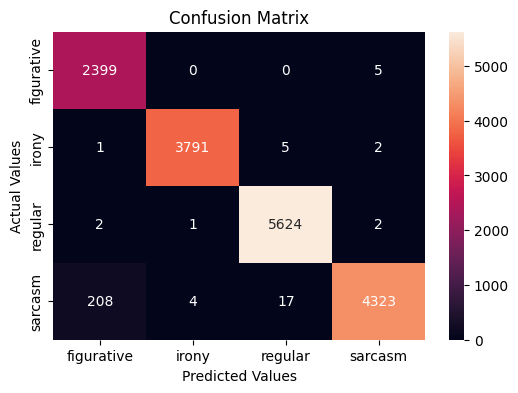


****************************************************************************

KNN CLASSIFIER
              precision    recall  f1-score   support

           0       0.19      0.98      0.32      2404
           1       0.75      0.12      0.21      3799
           2       0.93      0.32      0.48      5629
           3       0.86      0.25      0.39      4552

    accuracy                           0.35     16384
   macro avg       0.68      0.42      0.35     16384
weighted avg       0.76      0.35      0.37     16384



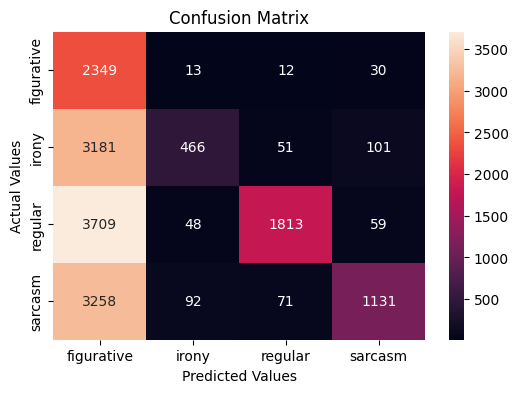


****************************************************************************

SUPPORT VECTOR MACHINE 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2404
           1       1.00      1.00      1.00      3799
           2       0.99      1.00      1.00      5629
           3       0.99      0.99      0.99      4552

    accuracy                           0.99     16384
   macro avg       0.99      0.99      0.99     16384
weighted avg       0.99      0.99      0.99     16384



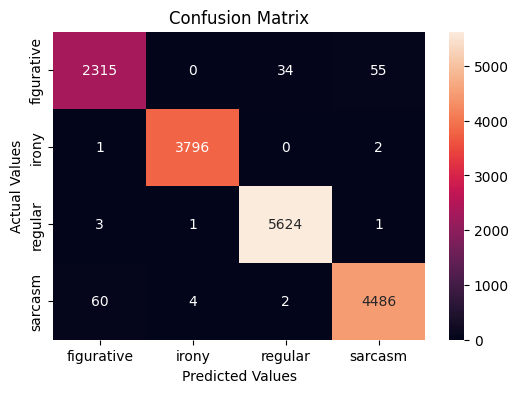


****************************************************************************

NAIVE BAYES CLASSIFIER
              precision    recall  f1-score   support

           0       0.95      0.67      0.79      2404
           1       0.94      0.94      0.94      3799
           2       0.84      0.94      0.89      5629
           3       0.92      0.94      0.93      4552

    accuracy                           0.90     16384
   macro avg       0.91      0.87      0.89     16384
weighted avg       0.90      0.90      0.90     16384



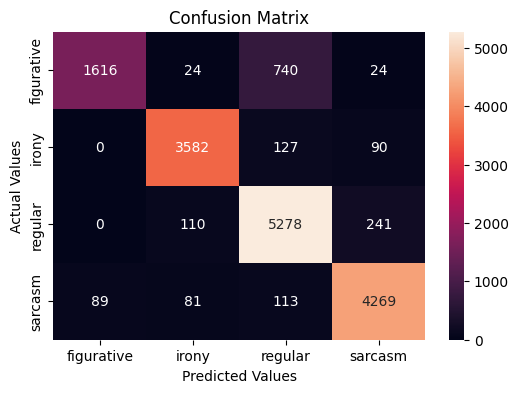


****************************************************************************

RANDOM FOREST
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2404
           1       1.00      1.00      1.00      3799
           2       1.00      1.00      1.00      5629
           3       0.99      0.98      0.99      4552

    accuracy                           0.99     16384
   macro avg       0.99      0.99      0.99     16384
weighted avg       0.99      0.99      0.99     16384



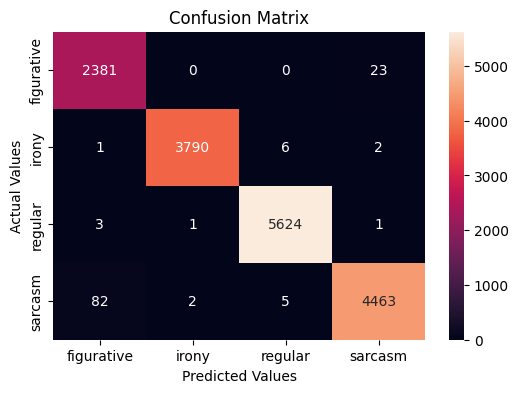


****************************************************************************

Weighted RANDOM FOREST
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2404
           1       1.00      1.00      1.00      3799
           2       1.00      1.00      1.00      5629
           3       0.99      0.98      0.99      4552

    accuracy                           0.99     16384
   macro avg       0.99      0.99      0.99     16384
weighted avg       0.99      0.99      0.99     16384



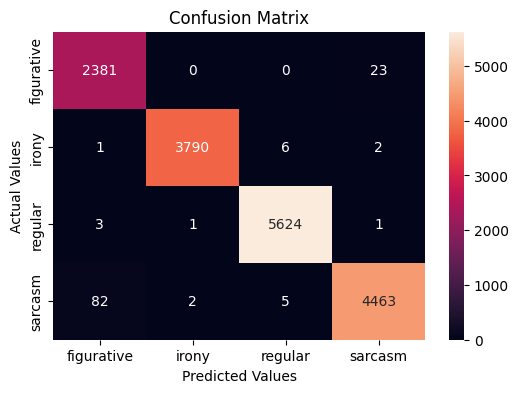


****************************************************************************

XGBOOST CLASSIFIER
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2404
           1       1.00      1.00      1.00      3799
           2       1.00      1.00      1.00      5629
           3       0.99      0.98      0.99      4552

    accuracy                           0.99     16384
   macro avg       0.99      0.99      0.99     16384
weighted avg       0.99      0.99      0.99     16384



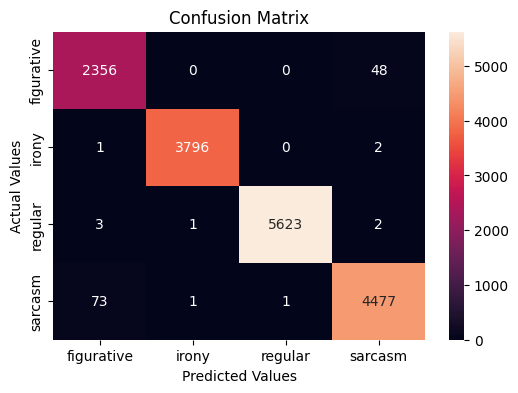

In [ ]:
## Logistic Regression
print("LOGISTIC REGRESSION")

#Clssification report
print(classification_report(y_test,lr_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## KNN Classifier
print("KNN CLASSIFIER")

#Clssification report
print(classification_report(y_test,knn_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## Support Vector Machines
print("SUPPORT VECTOR MACHINE ")

#Clssification report
print(classification_report(y_test,clf_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,clf_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## Multinomial Naive Bayes
print("NAIVE BAYES CLASSIFIER")

#Clssification report
print(classification_report(y_test,mnb_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,mnb_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## RANDOM FOREST
print("RANDOM FOREST")

#Clssification report
print(classification_report(y_test,rf_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## Weighted Random Forest
print('Weighted RANDOM FOREST')
#Clssification report
print(classification_report(y_test,rf_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()
print()
print("****************************************************************************")
print()


## XG Boost Classifier
print("XGBOOST CLASSIFIER")

#Clssification report
print(classification_report(y_test,xgbc_pred))

#Confusion Report
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,xgbc_pred),annot=True,fmt='g',xticklabels=tweet['class'].unique(),yticklabels=tweet['class'].unique())
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix')
plt.show()
